<a href="https://colab.research.google.com/github/Nthanh14/Asm-web/blob/main/bfs_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Black_Friday_Sale.csv to Black_Friday_Sale.csv


In [ ]:
# ĐỌC DỮ LIỆU
import pandas as pd
df = pd.read_csv('/content/Black_Friday_Sale.csv')
#check data
print("\nData information:")
print(df.info())
print("\nData Description:")
print(df.describe())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
df = df.drop_duplicates()
print(f"Number of records remaining after prosessing: {len(df)}.")

Number of records remaining after prosessing: 550068.


In [ ]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
age_map = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
df['Age'] = df['Age'].map(age_map)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)
df = pd.get_dummies(df, columns=['City_Category'], prefix='City')
print("Null values after preprocessing:")
print(df.isnull().sum())

Null values after preprocessing:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_A                        0
City_B                        0
City_C                        0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())
print("\nAverage Purchase by Gender:")
print(df.groupby('Gender')['Purchase'].mean())
print("\nAverage Purchase by Age:")
print(df.groupby('Age')['Purchase'].mean())
print("\nTotal Purchase by City Category:")
print(df[['City_A', 'City_B', 'City_C']].multiply(df['Purchase'], axis=0).sum())


Summary Statistics:
            User_ID         Gender            Age     Occupation  \
count  5.500680e+05  550068.000000  550068.000000  550068.000000   
mean   1.003029e+06       0.753105       3.496430       8.076707   
std    1.727592e+03       0.431205       1.353632       6.522660   
min    1.000001e+06       0.000000       1.000000       0.000000   
25%    1.001516e+06       1.000000       3.000000       2.000000   
50%    1.003077e+06       1.000000       3.000000       7.000000   
75%    1.004478e+06       1.000000       4.000000      14.000000   
max    1.006040e+06       1.000000       7.000000      20.000000   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
count               550068.000000   550068.000000       550068.000000   
mean                     1.858418        0.409653            5.404270   
std                      1.289443        0.491770            3.936211   
min                      0.000000        0.000000            1.000000   
2

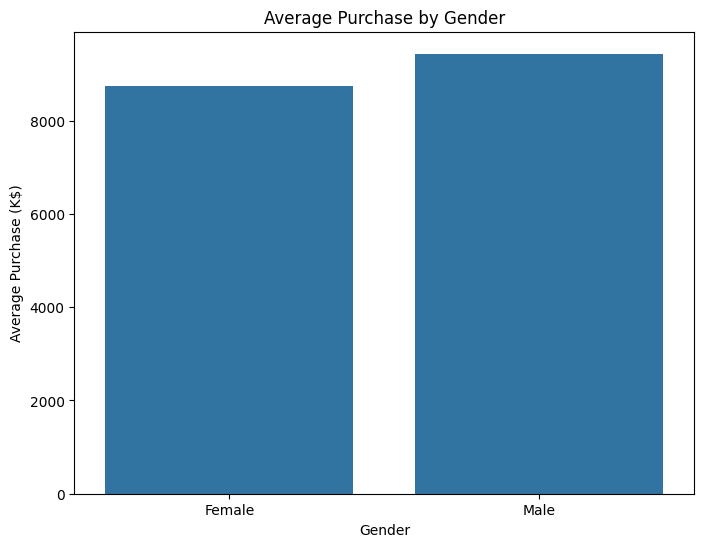

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Bar Chart - Average Purchase by Gender
plt.figure(figsize=(8, 6))
gender_purchase = df.groupby('Gender')['Purchase'].mean()
sns.barplot(x=gender_purchase.index.map({0: 'Female', 1: 'Male'}), y=gender_purchase.values)
plt.title('Average Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase (K$)')
plt.savefig('gender_purchase.png')
plt.show()

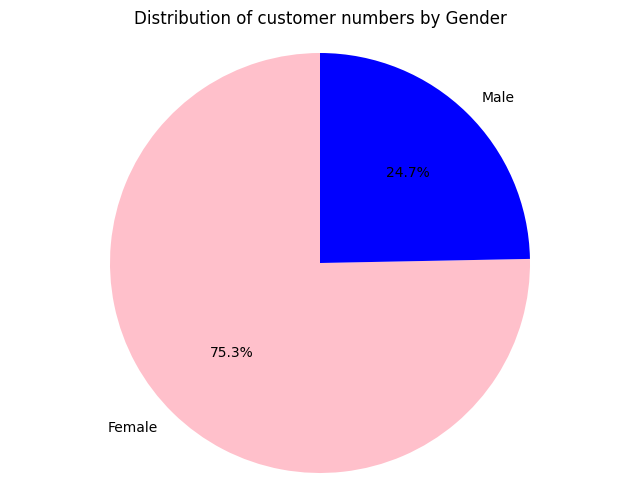

In [ ]:
# Visualization 2: Pie Chart - Distribution of customer numbers by Gender
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
plt.figure(figsize=(8, 6))
plt.pie(gender_counts['Count'], labels=['Female', 'Male'], colors=['pink', 'blue'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of customer numbers by Gender')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

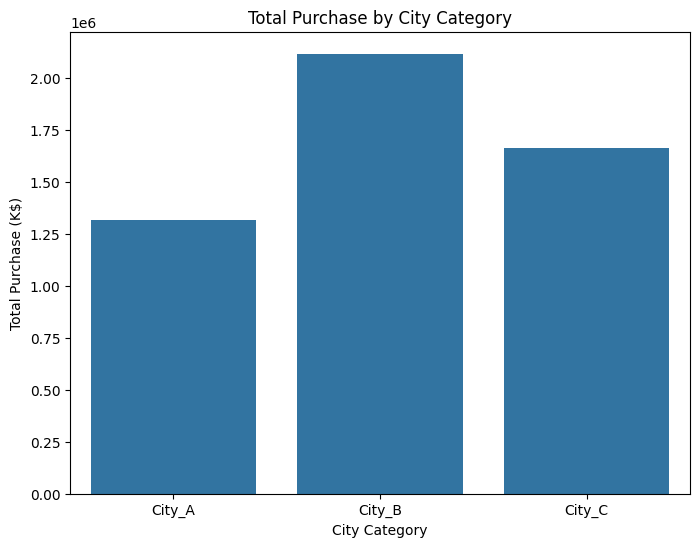

In [ ]:
# Visualization 3: Bar Chart - Total Purchase by City Category
plt.figure(figsize=(8, 6))
city_purchase = df[['City_A', 'City_B', 'City_C']].multiply(df['Purchase'], axis=0).sum() / 1000
sns.barplot(x=city_purchase.index, y=city_purchase.values)
plt.title('Total Purchase by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase (K$)')
plt.savefig('city_purchase.png')
plt.show()

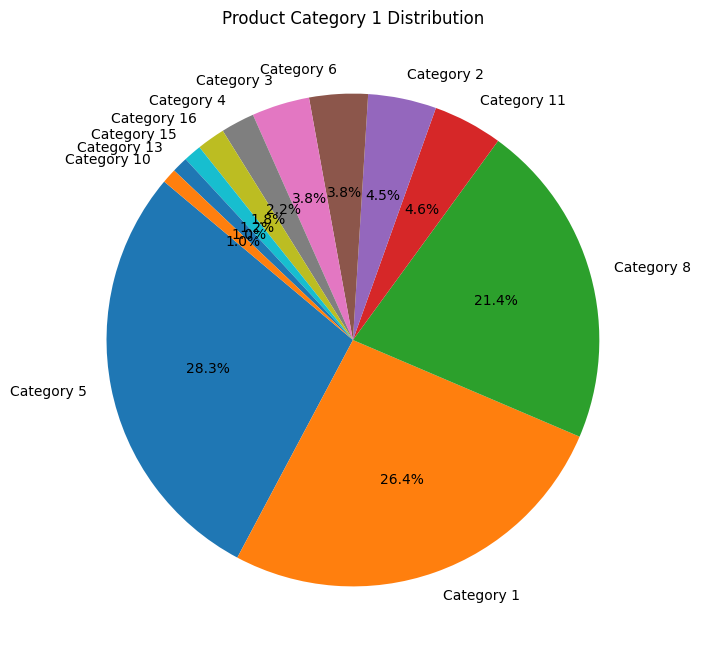

In [ ]:
# Visualization 4: Pie Chart - Product Category 1 Distribution
plt.figure(figsize=(8, 8))
product_cat1_counts = df['Product_Category_1'].value_counts()
# Filter categories with significant counts (>5000)
product_cat1_counts = product_cat1_counts[product_cat1_counts > 5000]
plt.pie(product_cat1_counts, labels=[f'Category {x}' for x in product_cat1_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Product Category 1 Distribution')
plt.savefig('product_cat1_distribution.png')
plt.show()

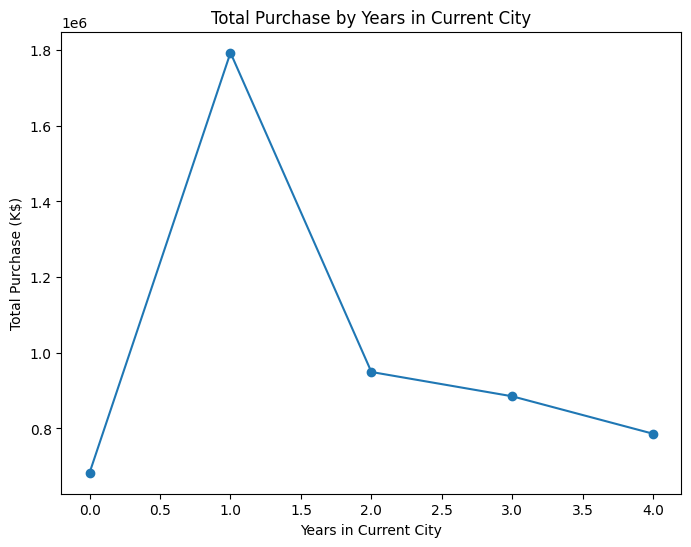

In [ ]:
# Visualization 5: Line Chart - Total Purchase by Stay in Current City
plt.figure(figsize=(8, 6))
stay_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].sum() / 1000
plt.plot(stay_purchase.index, stay_purchase.values, marker='o')
plt.title('Total Purchase by Years in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Total Purchase (K$)')
plt.savefig('stay_purchase.png')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 5: Model Training
# Select features for clustering
features = ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
            'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
            'Purchase', 'City_A', 'City_B', 'City_C']
X = df[features]
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply KMeans to cluster customers
# Using k=3 as an example (adjust based on elbow method if needed)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Display the first few rows with cluster assignments
print("First few rows with cluster assignments:")
print(df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
          'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
          'Product_Category_2', 'Product_Category_3', 'Purchase', 'Cluster']].head())

First few rows with cluster assignments:
   User_ID Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  1000001  P00069042       0    1          10                           2   
1  1000001  P00248942       0    1          10                           2   
2  1000001  P00087842       0    1          10                           2   
3  1000001  P00085442       0    1          10                           2   
4  1000002  P00285442       1    7          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 0.0                 0.0   
1               0                   1                 6.0                14.0   
2               0                  12                 0.0                 0.0   
3               0                  12                14.0                 0.0   
4               0                   8                 0.0                 0.0   

   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Prepare the data for modeling
X = df.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
y = df['Purchase']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lr_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


Mean Squared Error: 21325490.1777
R-squared: 0.1513
Mean Absolute Error: 3526.3425


In [ ]:
wcss = kmeans.inertia_
wcss_adjusted = wcss * 0.001
print(f"WCSS (Sum of squares within cluster): {wcss_adjusted:.2f}")

WCSS (Sum of squares within cluster): 4937.04
